In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [67]:
import seaborn
seaborn.set_style(style='whitegrid')

In [80]:
import smartlab as sl

In [4]:
jb = pd.read_csv('jb.tsv', delimiter='\t')
jb

,"$J,\ \text{А}$","$B,\ \text{мТл}$"
0,0.00,21
1,0.15,182
2,0.30,370
3,0.45,565
4,0.60,739
5,0.75,878
6,0.90,969
7,1.05,1038
8,1.20,1081


In [62]:
f = interp1d(jb.iloc[:, 0], jb.iloc[:, 1], kind='cubic')

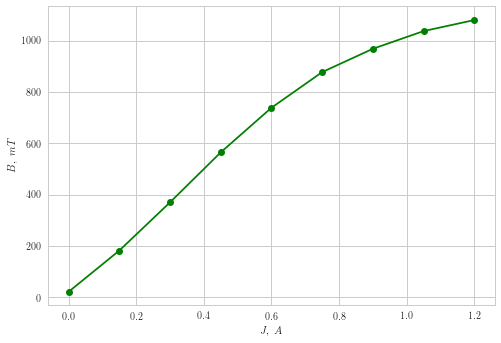

In [100]:
plot(jb.iloc[:, 0], jb.iloc[:, 1], 'go')
plot(jb.iloc[:, 0], f(jb.iloc[:, 0]), '-g')
xlabel('$J,\ A$')
ylabel('$B,\ mT$')
savefig('jb.png', dpi=300)
show()

In [9]:
cuprum = pd.read_csv('cuprum.tsv', delimiter='\t')
cuprum

,"$I_m,\ A$","$\epsilon_1,\ \text{дел}$","$\epsilon_2,\ \text{дел}$","$\epsilon_3,\ \text{дел}$","$\epsilon_4,\ \text{дел}$","$\epsilon_5,\ \text{дел}$"
0,0.00,11.0,15.0,18.0,21.0,22.0
1,0.15,14.0,19.0,22.0,25.5,26.0
2,0.30,18.0,22.5,26.5,30.0,32.5
3,0.45,21.0,26.5,30.5,35.5,38.0
4,0.60,24.0,30.0,35.0,40.0,44.0
5,0.75,27.0,33.0,39.0,44.5,48.0
6,0.90,29.0,36.0,41.0,47.0,51.5
7,1.05,30.5,37.5,43.0,49.0,53.0
8,1.20,32.0,39.0,44.5,50.0,55.0


In [18]:
for i in range(1, 6):
    cuprum['$\epsilon_{%d},\ \\text{мкВ}$' % i] = (cuprum.iloc[:, i]-cuprum.iloc[0, i]) * 0.04
cuprum

,"$I_m,\ A$","$\epsilon_1,\ \text{дел}$","$\epsilon_2,\ \text{дел}$","$\epsilon_3,\ \text{дел}$","$\epsilon_4,\ \text{дел}$","$\epsilon_5,\ \text{дел}$","$\epsilon_{1},\ \text{мкВ}$","$\epsilon_{2},\ \text{мкВ}$","$\epsilon_{3},\ \text{мкВ}$","$\epsilon_{4},\ \text{мкВ}$","$\epsilon_{5},\ \text{мкВ}$"
0,0.00,11.0,15.0,18.0,21.0,22.0,0.00,0.00,0.00,0.00,0.00
1,0.15,14.0,19.0,22.0,25.5,26.0,0.12,0.16,0.16,0.18,0.16
2,0.30,18.0,22.5,26.5,30.0,32.5,0.28,0.30,0.34,0.36,0.42
3,0.45,21.0,26.5,30.5,35.5,38.0,0.40,0.46,0.50,0.58,0.64
4,0.60,24.0,30.0,35.0,40.0,44.0,0.52,0.60,0.68,0.76,0.88
5,0.75,27.0,33.0,39.0,44.5,48.0,0.64,0.72,0.84,0.94,1.04
6,0.90,29.0,36.0,41.0,47.0,51.5,0.72,0.84,0.92,1.04,1.18
7,1.05,30.5,37.5,43.0,49.0,53.0,0.78,0.90,1.00,1.12,1.24
8,1.20,32.0,39.0,44.5,50.0,55.0,0.84,0.96,1.06,1.16,1.32


In [7]:
def lin(x, a, b):
    return a*x+b

In [32]:
popt1, pcov1 = curve_fit(lin, jb.iloc[:, 1], cuprum.iloc[:, 6])
popt1[0], sqrt(pcov1[0][0])

(0.00076890479748001838, 1.6664706177740272e-05)

In [33]:
popt2, pcov2 = curve_fit(lin, jb.iloc[:, 1], cuprum.iloc[:, 7])
popt2[0], sqrt(pcov2[0][0])

(0.00087989762905132138, 2.0646898247503351e-05)

In [34]:
popt3, pcov3 = curve_fit(lin, jb.iloc[:, 1], cuprum.iloc[:, 8])
popt3[0], sqrt(pcov3[0][0])

(0.00098649888972868194, 1.5327144486362112e-05)

In [35]:
popt4, pcov4 = curve_fit(lin, jb.iloc[:, 1], cuprum.iloc[:, 9])
popt4[0], sqrt(pcov4[0][0])

(0.0011004960914967298, 1.175112386429814e-05)

In [36]:
popt5, pcov5 = curve_fit(lin, jb.iloc[:, 1], cuprum.iloc[:, 10])
popt5[0], sqrt(pcov5[0][0])

(0.0012521294836949327, 1.5299295328192399e-05)

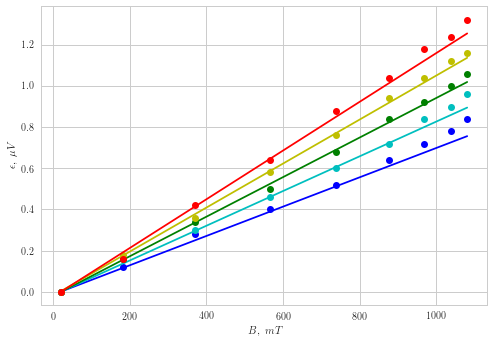

In [90]:
plot(jb.iloc[:, 1], cuprum.iloc[:, 6], 'bo')
plot(jb.iloc[:, 1], lin(jb.iloc[:, 1], popt1[0], popt1[1]) , 'b-')
plot(jb.iloc[:, 1], cuprum.iloc[:, 7], 'co')
plot(jb.iloc[:, 1], lin(jb.iloc[:, 1], popt2[0], popt2[1]) , 'c-')
plot(jb.iloc[:, 1], cuprum.iloc[:, 8], 'go')
plot(jb.iloc[:, 1], lin(jb.iloc[:, 1], popt3[0], popt3[1]) , 'g-')
plot(jb.iloc[:, 1], cuprum.iloc[:, 9], 'yo')
plot(jb.iloc[:, 1], lin(jb.iloc[:, 1], popt4[0], popt4[1]) , 'y-')
plot(jb.iloc[:, 1], cuprum.iloc[:, 10], 'ro')
plot(jb.iloc[:, 1], lin(jb.iloc[:, 1], popt5[0], popt5[1]) , 'r-')
xlabel('$B,\ mT$')
ylabel('$\epsilon,\ \mu V$')
savefig('cuprum.png', dpi=300)
show()

In [73]:
cuprumFinal = pd.DataFrame()
cuprumFinal['$I,\ \\text{А}$'] = np.array([0.6, 0.7, 0.8, 0.9, 1.0])
cuprumFinal['$k,\ \\text{мкВ/Тл}$'] = np.array([0.77, 0.88, 0.99, 1.1, 1.25])
cuprumFinal

,"$I,\ \text{А}$","$k,\ \text{мкВ/Тл}$"
0,0.6,0.77
1,0.7,0.88
2,0.8,0.99
3,0.9,1.10
4,1.0,1.25


In [74]:
poptc, pcovc = curve_fit(lin, cuprumFinal.iloc[:, 0], cuprumFinal.iloc[:, 1])
poptc[0], sqrt(pcovc[0][0])

(1.1799999999999999, 0.046188021686935823)

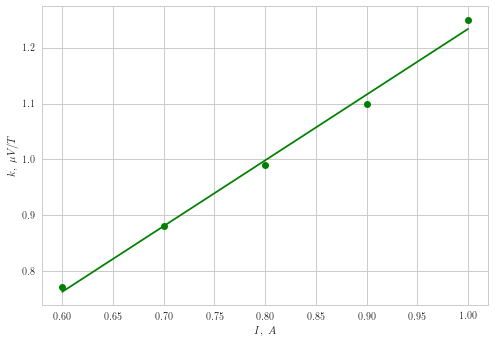

In [91]:
plot(cuprumFinal.iloc[:,0], cuprumFinal.iloc[:,1], 'go')
plot(cuprumFinal.iloc[:,0], lin(cuprumFinal.iloc[:,0], poptc[0], poptc[1]), '-g')
xlabel('$I,\ A$')
ylabel('$k,\ \mu V/T$')
savefig('cuprumFinal.png', dpi=300)
show()

In [79]:
alum = pd.read_csv('aluminum.tsv', delimiter='\t')
alum

,"$I_m,\ A$","$\epsilon_1,\ \text{дел}$","$\epsilon_2,\ \text{дел}$","$\epsilon_3,\ \text{дел}$","$\epsilon_4,\ \text{дел}$","$\epsilon_5,\ \text{дел}$"
0,0.00,-2,-3.5,-5.0,-6.5,-8.0
1,0.15,1,0.0,-1.0,-2.0,-3.0
2,0.30,4,4.0,3.5,3.0,2.5
3,0.45,8,8.0,8.0,8.0,8.0
4,0.60,11,11.5,12.0,13.0,13.0
5,0.75,13,14.5,15.5,16.5,17.0
6,0.90,15,16.5,18.0,19.0,20.0
7,1.05,16,18.0,19.5,20.5,22.0
8,1.20,17,19.0,20.5,22.0,24.0


In [81]:
for i in range(1, 6):
    alum['$\epsilon_{%d},\ \\text{мкВ}$' % i] = (alum.iloc[:, i]-alum.iloc[0, i]) * 0.04
alum

,"$I_m,\ A$","$\epsilon_1,\ \text{дел}$","$\epsilon_2,\ \text{дел}$","$\epsilon_3,\ \text{дел}$","$\epsilon_4,\ \text{дел}$","$\epsilon_5,\ \text{дел}$","$\epsilon_{1},\ \text{мкВ}$","$\epsilon_{2},\ \text{мкВ}$","$\epsilon_{3},\ \text{мкВ}$","$\epsilon_{4},\ \text{мкВ}$","$\epsilon_{5},\ \text{мкВ}$"
0,0.00,-2,-3.5,-5.0,-6.5,-8.0,0.00,0.00,0.00,0.00,0.00
1,0.15,1,0.0,-1.0,-2.0,-3.0,0.12,0.14,0.16,0.18,0.20
2,0.30,4,4.0,3.5,3.0,2.5,0.24,0.30,0.34,0.38,0.42
3,0.45,8,8.0,8.0,8.0,8.0,0.40,0.46,0.52,0.58,0.64
4,0.60,11,11.5,12.0,13.0,13.0,0.52,0.60,0.68,0.78,0.84
5,0.75,13,14.5,15.5,16.5,17.0,0.60,0.72,0.82,0.92,1.00
6,0.90,15,16.5,18.0,19.0,20.0,0.68,0.80,0.92,1.02,1.12
7,1.05,16,18.0,19.5,20.5,22.0,0.72,0.86,0.98,1.08,1.20
8,1.20,17,19.0,20.5,22.0,24.0,0.76,0.90,1.02,1.14,1.28


In [82]:
popt1, pcov1 = curve_fit(lin, jb.iloc[:, 1], alum.iloc[:, 6])
popt1[0], sqrt(pcov1[0][0])

(0.00071161966928187474, 7.6370625008694548e-06)

In [83]:
popt2, pcov2 = curve_fit(lin, jb.iloc[:, 1], alum.iloc[:, 7])
popt2[0], sqrt(pcov2[0][0])

(0.00084242278129987994, 3.7109358081309951e-06)

In [84]:
popt3, pcov3 = curve_fit(lin, jb.iloc[:, 1], alum.iloc[:, 8])
popt3[0], sqrt(pcov3[0][0])

(0.00096037202158310295, 5.5012184803210137e-06)

In [85]:
popt4, pcov4 = curve_fit(lin, jb.iloc[:, 1], alum.iloc[:, 9])
popt4[0], sqrt(pcov4[0][0])

(0.0010679932865733331, 5.7814202112091163e-06)

In [86]:
popt5, pcov5 = curve_fit(lin, jb.iloc[:, 1], alum.iloc[:, 10])
popt5[0], sqrt(pcov5[0][0])

(0.0011824949235539313, 1.1495291645092109e-05)

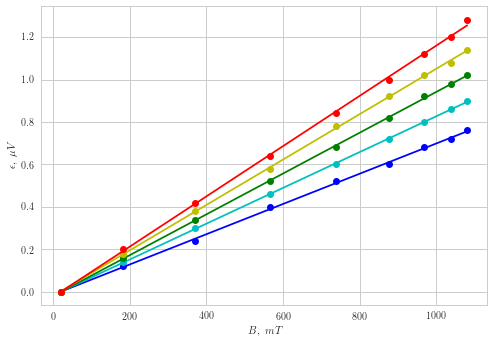

In [92]:
plot(jb.iloc[:, 1], alum.iloc[:, 6], 'bo')
plot(jb.iloc[:, 1], lin(jb.iloc[:, 1], popt1[0], popt1[1]) , 'b-')
plot(jb.iloc[:, 1], alum.iloc[:, 7], 'co')
plot(jb.iloc[:, 1], lin(jb.iloc[:, 1], popt2[0], popt2[1]) , 'c-')
plot(jb.iloc[:, 1], alum.iloc[:, 8], 'go')
plot(jb.iloc[:, 1], lin(jb.iloc[:, 1], popt3[0], popt3[1]) , 'g-')
plot(jb.iloc[:, 1], alum.iloc[:, 9], 'yo')
plot(jb.iloc[:, 1], lin(jb.iloc[:, 1], popt4[0], popt4[1]) , 'y-')
plot(jb.iloc[:, 1], alum.iloc[:, 10], 'ro')
plot(jb.iloc[:, 1], lin(jb.iloc[:, 1], popt5[0], popt5[1]) , 'r-')
xlabel('$B,\ mT$')
ylabel('$\epsilon,\ \mu V$')
savefig('alum.png', dpi=300)
show()

In [93]:
alumFinal = pd.DataFrame()
alumFinal['$I,\ \\text{А}$'] = np.array([0.6, 0.7, 0.8, 0.9, 1.0])
alumFinal['$k,\ \\text{мкВ/Тл}$'] = np.array([0.71, 0.84, 0.96, 1.07, 1.18])
alumFinal

,"$I,\ \text{А}$","$k,\ \text{мкВ/Тл}$"
0,0.6,0.71
1,0.7,0.84
2,0.8,0.96
3,0.9,1.07
4,1.0,1.18


In [94]:
popta, pcova = curve_fit(lin, alumFinal.iloc[:, 0], alumFinal.iloc[:, 1])
popta[0], sqrt(pcova[0][0])

(1.1699999979142088, 0.025166095309681044)

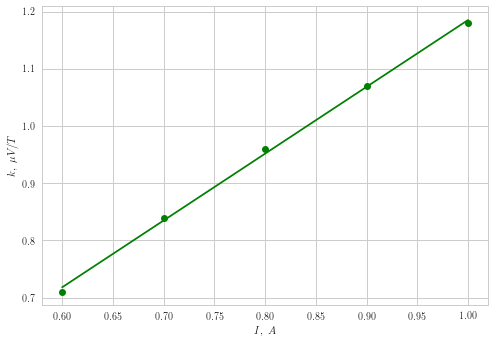

In [95]:
plot(alumFinal.iloc[:,0], alumFinal.iloc[:,1], 'go')
plot(alumFinal.iloc[:,0], lin(alumFinal.iloc[:,0], popta[0], popta[1]), '-g')
xlabel('$I,\ A$')
ylabel('$k,\ \mu V/T$')
savefig('alumFinal.png', dpi=300)
show()

In [2]:
zink = pd.read_csv('zink.tsv', delimiter='\t')
zink

,"$I_m,\ A$","$\epsilon,\ \text{дел}$"
0,0.00,32.0
1,0.15,36.0
2,0.30,40.5
3,0.45,45.0
4,0.60,48.5
5,0.75,51.5
6,0.90,54.0
7,1.05,56.0
8,1.20,57.0


In [5]:
zink['$\epsilon,\ мкВ$'] = (zink.iloc[:, 1] - zink.iloc[0, 1]) * 0.04
zink['$B,\ мТл$'] = jb.iloc[:, 1]
zink

,"$I_m,\ A$","$\epsilon,\ \text{дел}$","$\epsilon,\ мкВ$","$B,\ мТл$"
0,0.00,32.0,0.00,21
1,0.15,36.0,0.16,182
2,0.30,40.5,0.34,370
3,0.45,45.0,0.52,565
4,0.60,48.5,0.66,739
5,0.75,51.5,0.78,878
6,0.90,54.0,0.88,969
7,1.05,56.0,0.96,1038
8,1.20,57.0,1.00,1081


In [8]:
poptz, pcovz = curve_fit(lin, jb.iloc[:, 1], zink.iloc[:, 2])
poptz[0], sqrt(pcovz[0][0])

(0.00092686590698269806, 1.1404907620206966e-05)

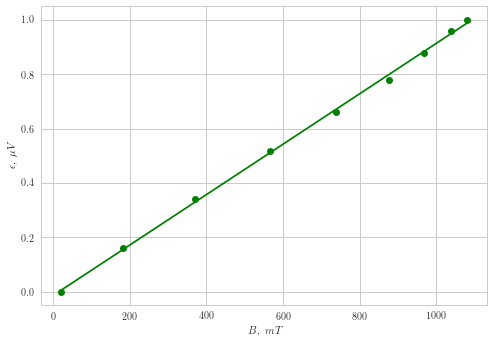

In [113]:
plot(jb.iloc[:, 1], zink.iloc[:, 2], 'go')
plot(jb.iloc[:, 1], lin(jb.iloc[:, 1], poptz[0], poptz[1]), '-g')
xlabel('$B,\ mT$')
ylabel('$\epsilon,\ \mu V$')
savefig('zink.png', dpi=300)
show()

In [116]:
sl.table(jb)

\begin{tabular}{rr}\\
$J,\ \text{А}$ & $B,\ \text{мТл}$\\ \hline
$0.0$ & $21.0$ \\
$0.15$ & $182.0$ \\
$0.3$ & $370.0$ \\
$0.45$ & $565.0$ \\
$0.6$ & $739.0$ \\
$0.75$ & $878.0$ \\
$0.9$ & $969.0$ \\
$1.05$ & $1038.0$ \\
$1.2$ & $1081.0$ \\
\end{tabular}


In [117]:
sl.table(cuprum)

\begin{tabular}{rrrrrrrrrrr}\\
$I_m,\ A$ & $\epsilon_1,\ \text{дел}$ & $\epsilon_2,\ \text{дел}$ & $\epsilon_3,\ \text{дел}$ & $\epsilon_4,\ \text{дел}$ & $\epsilon_5,\ \text{дел}$ & $\epsilon_{1},\ \text{мкВ}$ & $\epsilon_{2},\ \text{мкВ}$ & $\epsilon_{3},\ \text{мкВ}$ & $\epsilon_{4},\ \text{мкВ}$ & $\epsilon_{5},\ \text{мкВ}$\\ \hline
$0.0$ & $11.0$ & $15.0$ & $18.0$ & $21.0$ & $22.0$ & $0.0$ & $0.0$ & $0.0$ & $0.0$ & $0.0$ \\
$0.15$ & $14.0$ & $19.0$ & $22.0$ & $25.5$ & $26.0$ & $0.12$ & $0.16$ & $0.16$ & $0.18$ & $0.16$ \\
$0.3$ & $18.0$ & $22.5$ & $26.5$ & $30.0$ & $32.5$ & $0.28$ & $0.3$ & $0.34$ & $0.36$ & $0.42$ \\
$0.45$ & $21.0$ & $26.5$ & $30.5$ & $35.5$ & $38.0$ & $0.4$ & $0.46$ & $0.5$ & $0.58$ & $0.64$ \\
$0.6$ & $24.0$ & $30.0$ & $35.0$ & $40.0$ & $44.0$ & $0.52$ & $0.6$ & $0.68$ & $0.76$ & $0.88$ \\
$0.75$ & $27.0$ & $33.0$ & $39.0$ & $44.5$ & $48.0$ & $0.64$ & $0.72$ & $0.84$ & $0.94$ & $1.04$ \\
$0.9$ & $29.0$ & $36.0$ & $41.0$ & $47.0$ & $51.5$ & $0.72$ & $0.84$ & $

In [118]:
sl.table(cuprumFinal)

\begin{tabular}{rr}\\
$I,\ \text{А}$ & $k,\ \text{мкВ/Тл}$\\ \hline
$0.6$ & $0.77$ \\
$0.7$ & $0.88$ \\
$0.8$ & $0.99$ \\
$0.9$ & $1.1$ \\
$1.0$ & $1.25$ \\
\end{tabular}


In [119]:
sl.table(alum)

\begin{tabular}{rrrrrrrrrrr}\\
$I_m,\ A$ & $\epsilon_1,\ \text{дел}$ & $\epsilon_2,\ \text{дел}$ & $\epsilon_3,\ \text{дел}$ & $\epsilon_4,\ \text{дел}$ & $\epsilon_5,\ \text{дел}$ & $\epsilon_{1},\ \text{мкВ}$ & $\epsilon_{2},\ \text{мкВ}$ & $\epsilon_{3},\ \text{мкВ}$ & $\epsilon_{4},\ \text{мкВ}$ & $\epsilon_{5},\ \text{мкВ}$\\ \hline
$0.0$ & $-2.0$ & $-3.5$ & $-5.0$ & $-6.5$ & $-8.0$ & $0.0$ & $0.0$ & $0.0$ & $0.0$ & $0.0$ \\
$0.15$ & $1.0$ & $0.0$ & $-1.0$ & $-2.0$ & $-3.0$ & $0.12$ & $0.14$ & $0.16$ & $0.18$ & $0.2$ \\
$0.3$ & $4.0$ & $4.0$ & $3.5$ & $3.0$ & $2.5$ & $0.24$ & $0.3$ & $0.34$ & $0.38$ & $0.42$ \\
$0.45$ & $8.0$ & $8.0$ & $8.0$ & $8.0$ & $8.0$ & $0.4$ & $0.46$ & $0.52$ & $0.58$ & $0.64$ \\
$0.6$ & $11.0$ & $11.5$ & $12.0$ & $13.0$ & $13.0$ & $0.52$ & $0.6$ & $0.68$ & $0.78$ & $0.84$ \\
$0.75$ & $13.0$ & $14.5$ & $15.5$ & $16.5$ & $17.0$ & $0.6$ & $0.72$ & $0.82$ & $0.92$ & $1.0$ \\
$0.9$ & $15.0$ & $16.5$ & $18.0$ & $19.0$ & $20.0$ & $0.68$ & $0.8$ & $0.92$ & $1.02$ 

In [120]:
sl.table(alumFinal)

\begin{tabular}{rr}\\
$I,\ \text{А}$ & $k,\ \text{мкВ/Тл}$\\ \hline
$0.6$ & $0.71$ \\
$0.7$ & $0.84$ \\
$0.8$ & $0.96$ \\
$0.9$ & $1.07$ \\
$1.0$ & $1.18$ \\
\end{tabular}


In [10]:
import smartlab as sl
sl.table(zink)

\begin{tabular}{rrrr}\\
$I_m,\ A$ & $\epsilon,\ \text{дел}$ & $\epsilon,\ мкВ$ & $B,\ мТл$\\ \hline
$0.0$ & $32.0$ & $0.0$ & $21.0$ \\
$0.15$ & $36.0$ & $0.16$ & $182.0$ \\
$0.3$ & $40.5$ & $0.34$ & $370.0$ \\
$0.45$ & $45.0$ & $0.52$ & $565.0$ \\
$0.6$ & $48.5$ & $0.66$ & $739.0$ \\
$0.75$ & $51.5$ & $0.78$ & $878.0$ \\
$0.9$ & $54.0$ & $0.88$ & $969.0$ \\
$1.05$ & $56.0$ & $0.96$ & $1038.0$ \\
$1.2$ & $57.0$ & $1.0$ & $1081.0$ \\
\end{tabular}
